In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive to access data
drive.mount('/content/drive')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Define data path
data_path = '/content/drive/MyDrive/PhyMER Dataset'

# List all files in the directory
import os
print("\nFiles in the PhyMER Dataset directory:")
print(os.listdir(data_path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Files in the PhyMER Dataset directory:
['README.pdf', 'labels.csv', 'Emotiv', 'Personality', 'E4']



Labels Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   experiment_code  771 non-null    object
 1   arousal          771 non-null    int64 
 2   valence          771 non-null    int64 
 3   emotion          771 non-null    object
dtypes: int64(2), object(2)
memory usage: 24.2+ KB
None

First few rows of labels:
  experiment_code  arousal  valence   emotion
0      SUB01TST04        8        3      fear
1      SUB01TST03        3        1       sad
2      SUB01TST02        5        5   neutral
3      SUB01VID25        8        7  surprise
4      SUB01VID24        4        4       sad

Unique emotions in dataset:
emotion
sad         167
neutral     131
fear        122
disgust     110
happy       104
surprise     69
angry        68
Name: count, dtype: int64


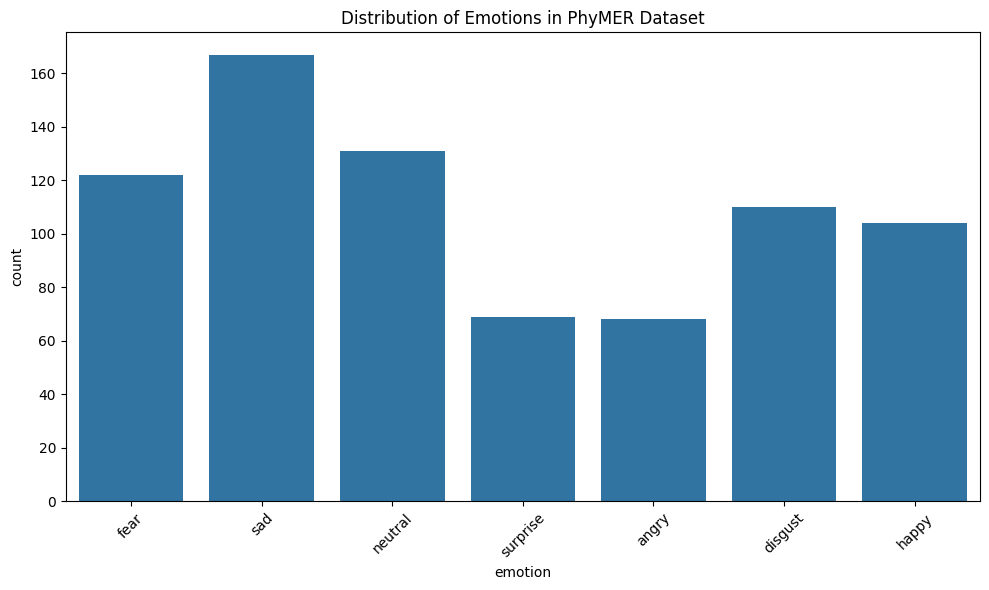

In [ ]:
# Load labels file
labels_df = pd.read_csv(f'{data_path}/labels.csv')

# Display basic information about the labels
print("\nLabels Dataset Info:")
print(labels_df.info())

print("\nFirst few rows of labels:")
print(labels_df.head())

print("\nUnique emotions in dataset:")
print(labels_df['emotion'].value_counts())

# Create a bar plot of emotion distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=labels_df, x='emotion')
plt.title('Distribution of Emotions in PhyMER Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Function to explore directory structure
def explore_directory(path, indent=0):
    print(' ' * indent + os.path.basename(path))
    if os.path.isdir(path):
        for item in os.listdir(path):
            explore_directory(os.path.join(path, item), indent + 2)

# Explore E4 directory structure
print("E4 Data Structure:")
explore_directory(f'{data_path}/E4')

# Load sample E4 data for one experiment
# Get first experiment code
sample_exp = labels_df['experiment_code'].iloc[0]
print(f"\nLoading sample data for experiment: {sample_exp}")

# Try to load corresponding E4 data
e4_path = f'{data_path}/E4/{sample_exp}'
if os.path.exists(e4_path):
    e4_files = os.listdir(e4_path)
    print("\nAvailable E4 files:")
    print(e4_files)

    # Load and display first few rows of each file
    for file in e4_files:
        if file.endswith('.csv'):
            print(f"\nReading {file}:")
            data = pd.read_csv(os.path.join(e4_path, file))
            print(data.head())
            print("\nShape:", data.shape)

E4 Data Structure:
E4
  SUB28
    SUB28VID25
      SUB28VID25_EDA_4.csv
      SUB28VID25_BVP_64.csv
      SUB28VID25_TEMP_4.csv
      SUB28VID25_HR_1.csv
    SUB28VID24
      SUB28VID24_HR_1.csv
      SUB28VID24_TEMP_4.csv
      SUB28VID24_EDA_4.csv
      SUB28VID24_BVP_64.csv
    SUB28VID23
      SUB28VID23_BVP_64.csv
      SUB28VID23_HR_1.csv
      SUB28VID23_TEMP_4.csv
      SUB28VID23_EDA_4.csv
    SUB28VID20
      SUB28VID20_HR_1.csv
      SUB28VID20_TEMP_4.csv
      SUB28VID20_EDA_4.csv
      SUB28VID20_BVP_64.csv
    SUB28VID21
      SUB28VID21_EDA_4.csv
      SUB28VID21_HR_1.csv
      SUB28VID21_BVP_64.csv
      SUB28VID21_TEMP_4.csv
    SUB28VID15
      SUB28VID15_EDA_4.csv
      SUB28VID15_BVP_64.csv
      SUB28VID15_TEMP_4.csv
      SUB28VID15_HR_1.csv
    SUB28VID16
      SUB28VID16_TEMP_4.csv
      SUB28VID16_HR_1.csv
      SUB28VID16_EDA_4.csv
      SUB28VID16_BVP_64.csv
    SUB28VID17
      SUB28VID17_HR_1.csv
      SUB28VID17_BVP_64.csv
      SUB28VID17_EDA_4.csv
      

In [ ]:
# Find a valid experiment code from the E4 directory
e4_path = f'{data_path}/E4'
subjects = os.listdir(e4_path)
valid_exp = None

# Find first valid experiment
for subject in subjects:
    subject_path = os.path.join(e4_path, subject)
    if os.path.isdir(subject_path):
        videos = os.listdir(subject_path)
        if videos:  # if subject has any videos
            valid_exp = videos[0]
            print(f"Found valid experiment: {valid_exp}")
            break

# Now load the signals with the valid experiment code
if valid_exp:
    signals = load_e4_signals(data_path, valid_exp)

    # Display basic information about loaded signals
    for signal_type, data in signals.items():
        print(f"\n{signal_type} Signal:")
        print(f"Shape: {data.shape}")
        print("First few values:")
        print(data.head())

        # Plot the signal
        plt.figure(figsize=(12, 3))
        plt.plot(data.values)
        plt.title(f'{signal_type} Signal for {valid_exp}')
        plt.xlabel('Samples')
        plt.ylabel('Amplitude')
        plt.show()
else:
    print("No valid experiments found in the E4 directory")

Found valid experiment: SUB28VID25
Data not found for SUB28VID25


AttributeError: 'NoneType' object has no attribute 'items'

Found valid experiment: SUB28/SUB28VID25

EDA Signal:
Shape: (483, 1)
First few values:
   0.199864
0  0.202426
1  0.202426
2  0.199864
3  0.202426
4  0.202426


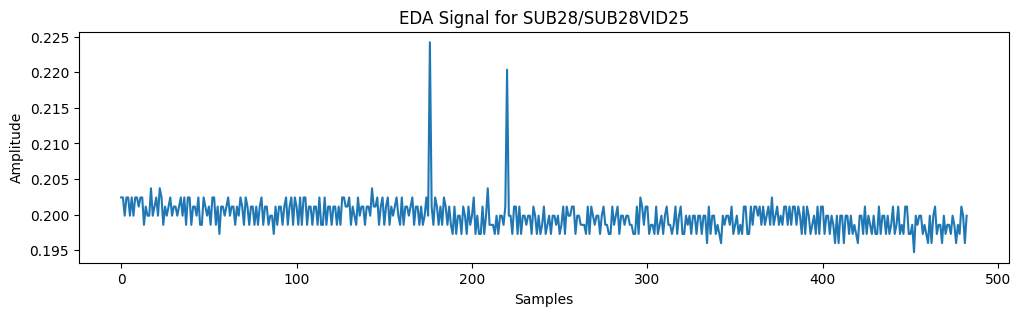


BVP Signal:
Shape: (7743, 1)
First few values:
   -25.0
0 -26.94
1 -29.57
2 -32.99
3 -37.00
4 -41.07


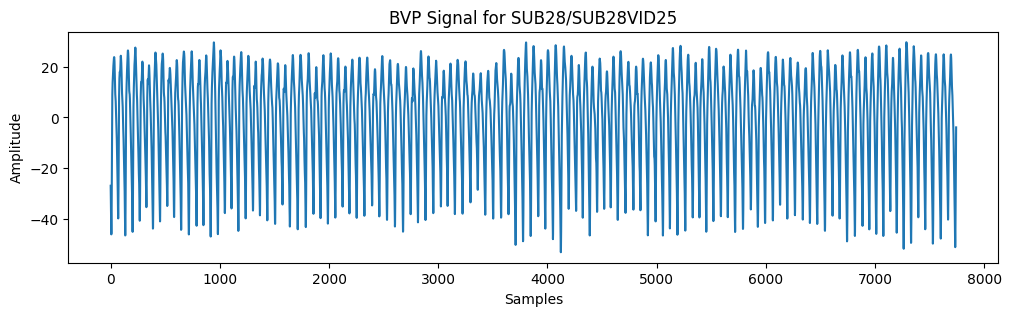


TEMP Signal:
Shape: (483, 1)
First few values:
   32.18
0  32.21
1  32.21
2  32.21
3  32.21
4  32.18


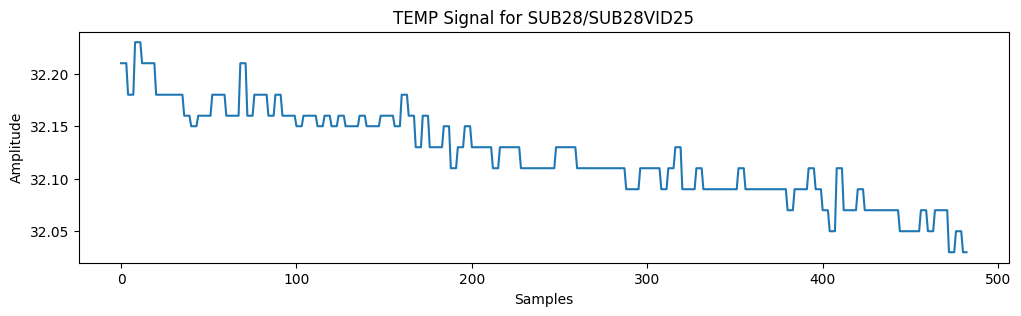


HR Signal:
Shape: (120, 1)
First few values:
   61.75
0  61.73
1  61.74
2  61.71
3  61.69
4  61.68


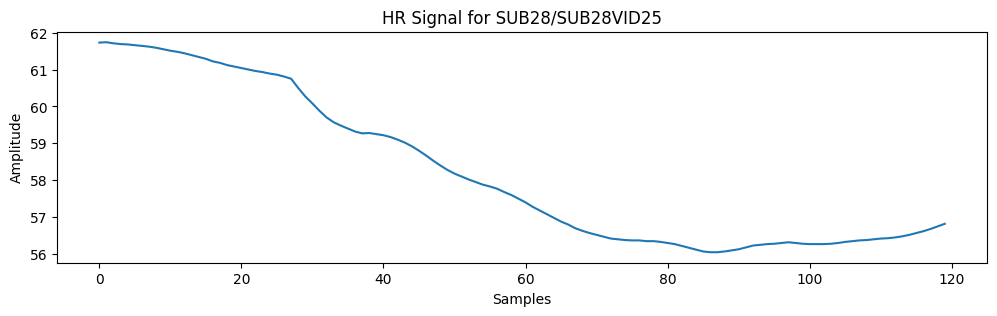

In [ ]:
# Find a valid experiment code from the E4 directory
e4_path = f'{data_path}/E4'
subjects = os.listdir(e4_path)
valid_exp = None
valid_subject = None

# Find first valid experiment
for subject in subjects:
    subject_path = os.path.join(e4_path, subject)
    if os.path.isdir(subject_path):
        experiments = os.listdir(subject_path)
        if experiments:  # if subject has any experiments
            valid_subject = subject
            valid_exp = experiments[0]
            print(f"Found valid experiment: {valid_subject}/{valid_exp}")
            break

# Modify the load_e4_signals function to handle the directory structure
def load_e4_signals(data_path, subject, experiment):
    """
    Load all E4 signals for a given experiment
    """
    signals = {}
    base_path = f'{data_path}/E4/{subject}/{experiment}'

    if not os.path.exists(base_path):
        print(f"Data not found for {subject}/{experiment}")
        return None

    # Load each signal type
    signal_types = {
        'EDA': '_EDA_4.csv',
        'BVP': '_BVP_64.csv',
        'TEMP': '_TEMP_4.csv',
        'HR': '_HR_1.csv'
    }

    for signal_type, file_suffix in signal_types.items():
        file_path = f'{base_path}/{experiment}{file_suffix}'
        if os.path.exists(file_path):
            signals[signal_type] = pd.read_csv(file_path)

    return signals

# Now load the signals with the valid experiment code
if valid_subject and valid_exp:
    signals = load_e4_signals(data_path, valid_subject, valid_exp)

    if signals:
        # Display basic information about loaded signals
        for signal_type, data in signals.items():
            print(f"\n{signal_type} Signal:")
            print(f"Shape: {data.shape}")
            print("First few values:")
            print(data.head())

            # Plot the signal
            plt.figure(figsize=(12, 3))
            plt.plot(data.values)
            plt.title(f'{signal_type} Signal for {valid_subject}/{valid_exp}')
            plt.xlabel('Samples')
            plt.ylabel('Amplitude')
            plt.show()
else:
    print("No valid experiments found in the E4 directory")


Extracted Features:
eda_mean: 0.1998
eda_std: 0.0023
eda_min: 0.1947
eda_max: 0.2242
eda_range: 0.0295
eda_median: 0.1999
bvp_mean: -0.0864
bvp_std: 19.3135
bvp_min: -53.1300
bvp_max: 29.6300
bvp_range: 82.7600
bvp_median: 5.4700
temp_mean: 32.1227
temp_std: 0.0424
temp_min: 32.0300
temp_max: 32.2300
temp_range: 0.2000
temp_median: 32.1100
hr_mean: 58.2158
hr_std: 2.0419
hr_min: 56.0500
hr_max: 61.7400
hr_range: 5.6900
hr_median: 57.4500


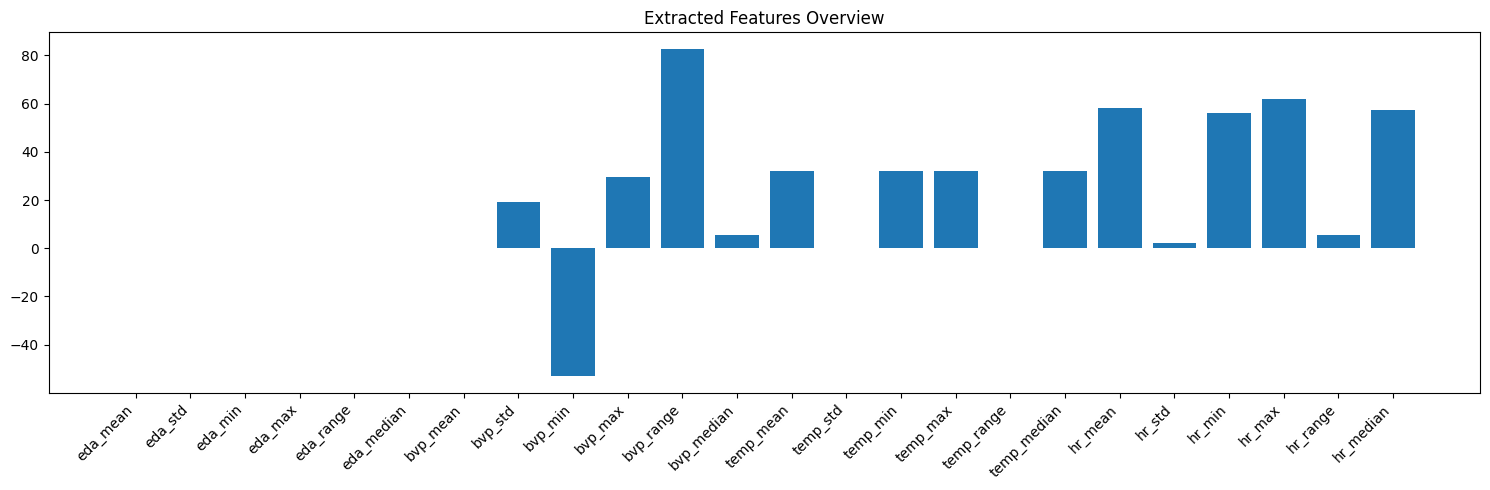

In [ ]:
def extract_features(signals):
    """
    Extract features from E4 signals
    """
    features = {}

    # EDA Features
    if 'EDA' in signals:
        eda = signals['EDA'].values.flatten()
        features.update({
            'eda_mean': np.mean(eda),
            'eda_std': np.std(eda),
            'eda_min': np.min(eda),
            'eda_max': np.max(eda),
            'eda_range': np.ptp(eda),  # peak to peak
            'eda_median': np.median(eda)
        })

    # BVP Features
    if 'BVP' in signals:
        bvp = signals['BVP'].values.flatten()
        features.update({
            'bvp_mean': np.mean(bvp),
            'bvp_std': np.std(bvp),
            'bvp_min': np.min(bvp),
            'bvp_max': np.max(bvp),
            'bvp_range': np.ptp(bvp),
            'bvp_median': np.median(bvp)
        })

    # Temperature Features
    if 'TEMP' in signals:
        temp = signals['TEMP'].values.flatten()
        features.update({
            'temp_mean': np.mean(temp),
            'temp_std': np.std(temp),
            'temp_min': np.min(temp),
            'temp_max': np.max(temp),
            'temp_range': np.ptp(temp),
            'temp_median': np.median(temp)
        })

    # HR Features
    if 'HR' in signals:
        hr = signals['HR'].values.flatten()
        features.update({
            'hr_mean': np.mean(hr),
            'hr_std': np.std(hr),
            'hr_min': np.min(hr),
            'hr_max': np.max(hr),
            'hr_range': np.ptp(hr),
            'hr_median': np.median(hr)
        })

    return features

# Extract features from our sample signals
features = extract_features(signals)

# Display extracted features
print("\nExtracted Features:")
for feature_name, value in features.items():
    print(f"{feature_name}: {value:.4f}")

# Create a bar plot of the features
plt.figure(figsize=(15, 5))
plt.bar(features.keys(), features.values())
plt.xticks(rotation=45, ha='right')
plt.title('Extracted Features Overview')
plt.tight_layout()
plt.show()

In [ ]:
def load_e4_signals(data_path, subject, experiment):
    """
    Load all E4 signals for a given experiment
    """
    signals = {}
    base_path = f'{data_path}/E4/{subject}/{experiment}'

    if not os.path.exists(base_path):
        print(f"Data not found for {subject}/{experiment}")
        return None

    # Load each signal type
    signal_types = {
        'EDA': '_EDA_4.csv',
        'BVP': '_BVP_64.csv',
        'TEMP': '_TEMP_4.csv',
        'HR': '_HR_1.csv'
    }

    for signal_type, file_suffix in signal_types.items():
        file_path = f'{base_path}/{experiment}{file_suffix}'
        try:
            # Read CSV with explicit header=None and names=['value']
            if os.path.exists(file_path):
                data = pd.read_csv(file_path, header=None, names=['value'])
                signals[signal_type] = data
        except Exception as e:
            print(f"Error loading {signal_type} from {file_path}: {str(e)}")
            continue

    return signals if signals else None

# Test the function with our previous example
signals = load_e4_signals(data_path, 'SUB28', 'SUB28VID25')

if signals:
    # Display basic information about loaded signals
    for signal_type, data in signals.items():
        print(f"\n{signal_type} Signal:")
        print(f"Shape: {data.shape}")
        print("First few values:")
        print(data.head())


EDA Signal:
Shape: (484, 1)
First few values:
      value
0  0.199864
1  0.202426
2  0.202426
3  0.199864
4  0.202426

BVP Signal:
Shape: (7744, 1)
First few values:
   value
0 -25.00
1 -26.94
2 -29.57
3 -32.99
4 -37.00

TEMP Signal:
Shape: (484, 1)
First few values:
   value
0  32.18
1  32.21
2  32.21
3  32.21
4  32.21

HR Signal:
Shape: (121, 1)
First few values:
   value
0  61.75
1  61.73
2  61.74
3  61.71
4  61.69


In [ ]:
def extract_features(signals):
    """
    Extract features from E4 signals
    """
    features = {}

    def safe_stats(signal):
        """Helper function to safely calculate statistics"""
        if len(signal) == 0:
            return {
                'mean': np.nan,
                'std': np.nan,
                'min': np.nan,
                'max': np.nan,
                'range': np.nan,
                'median': np.nan
            }

        return {
            'mean': np.mean(signal),
            'std': np.std(signal),
            'min': np.min(signal),
            'max': np.max(signal),
            'range': np.ptp(signal),
            'median': np.median(signal)
        }

    # EDA Features
    if 'EDA' in signals and not signals['EDA'].empty:
        eda = signals['EDA']['value'].values
        eda_stats = safe_stats(eda)
        features.update({
            'eda_mean': eda_stats['mean'],
            'eda_std': eda_stats['std'],
            'eda_min': eda_stats['min'],
            'eda_max': eda_stats['max'],
            'eda_range': eda_stats['range'],
            'eda_median': eda_stats['median']
        })

    # BVP Features
    if 'BVP' in signals and not signals['BVP'].empty:
        bvp = signals['BVP']['value'].values
        bvp_stats = safe_stats(bvp)
        features.update({
            'bvp_mean': bvp_stats['mean'],
            'bvp_std': bvp_stats['std'],
            'bvp_min': bvp_stats['min'],
            'bvp_max': bvp_stats['max'],
            'bvp_range': bvp_stats['range'],
            'bvp_median': bvp_stats['median']
        })

    # Temperature Features
    if 'TEMP' in signals and not signals['TEMP'].empty:
        temp = signals['TEMP']['value'].values
        temp_stats = safe_stats(temp)
        features.update({
            'temp_mean': temp_stats['mean'],
            'temp_std': temp_stats['std'],
            'temp_min': temp_stats['min'],
            'temp_max': temp_stats['max'],
            'temp_range': temp_stats['range'],
            'temp_median': temp_stats['median']
        })

    # HR Features
    if 'HR' in signals and not signals['HR'].empty:
        hr = signals['HR']['value'].values
        hr_stats = safe_stats(hr)
        features.update({
            'hr_mean': hr_stats['mean'],
            'hr_std': hr_stats['std'],
            'hr_min': hr_stats['min'],
            'hr_max': hr_stats['max'],
            'hr_range': hr_stats['range'],
            'hr_median': hr_stats['median']
        })

    return features

# Test the function with our previous example
signals = load_e4_signals(data_path, 'SUB28', 'SUB28VID25')
if signals:
    features = extract_features(signals)
    print("\nExtracted Features:")
    for feature_name, value in features.items():
        print(f"{feature_name}: {value:.4f}")


Extracted Features:
eda_mean: 0.1998
eda_std: 0.0023
eda_min: 0.1947
eda_max: 0.2242
eda_range: 0.0295
eda_median: 0.1999
bvp_mean: -0.0896
bvp_std: 19.3143
bvp_min: -53.1300
bvp_max: 29.6300
bvp_range: 82.7600
bvp_median: 5.4650
temp_mean: 32.1228
temp_std: 0.0424
temp_min: 32.0300
temp_max: 32.2300
temp_range: 0.2000
temp_median: 32.1100
hr_mean: 58.2450
hr_std: 2.0585
hr_min: 56.0500
hr_max: 61.7500
hr_range: 5.7000
hr_median: 57.5000


Creating dataset...
Processing subject: SUB28
  Successfully processed: SUB28VID25
  Successfully processed: SUB28VID24
  Successfully processed: SUB28VID23
  Successfully processed: SUB28VID20
  Successfully processed: SUB28VID21
  Successfully processed: SUB28VID15
  Successfully processed: SUB28VID16
  Successfully processed: SUB28VID17
  Successfully processed: SUB28VID19
  Successfully processed: SUB28VID18
  Successfully processed: SUB28VID13
  Successfully processed: SUB28VID14
  Successfully processed: SUB28VID12
  Successfully processed: SUB28VID11
  Successfully processed: SUB28VID09
  Successfully processed: SUB28VID10
  Successfully processed: SUB28VID02
  Successfully processed: SUB28VID04
  Successfully processed: SUB28VID03
  Successfully processed: SUB28VID07
  Successfully processed: SUB28VID05
  Successfully processed: SUB28VID08
  Successfully processed: SUB28VID01
Processing subject: SUB24
  Successfully processed: SUB24VID25
  Successfully processed: SUB24VID24
  S

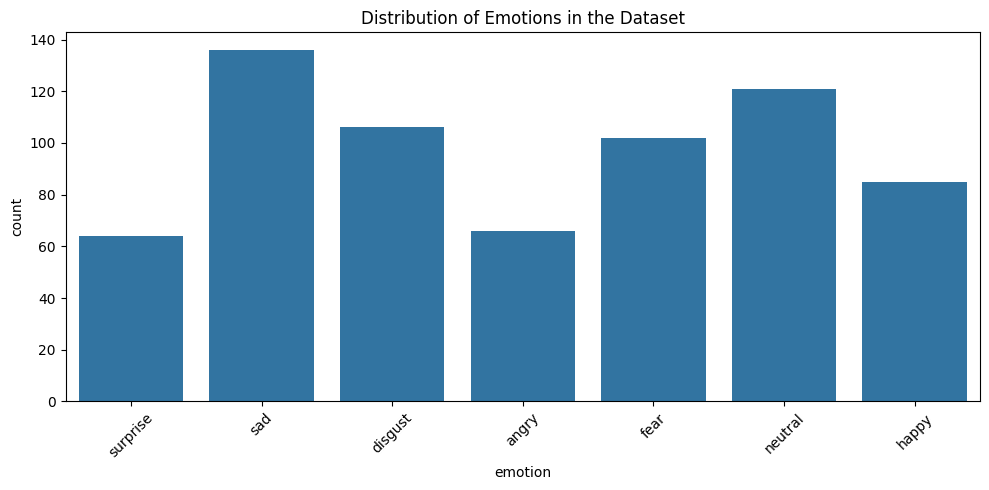


Dataset saved to processed_dataset.csv


In [ ]:
def create_dataset(data_path, labels_df):
    """
    Create complete dataset with features and labels
    """
    all_features = []
    skipped_experiments = []

    # Iterate through all subjects in E4 directory
    e4_path = f'{data_path}/E4'
    for subject in os.listdir(e4_path):
        subject_path = os.path.join(e4_path, subject)
        if os.path.isdir(subject_path):
            print(f"Processing subject: {subject}")

            # Process each experiment for the subject
            for experiment in os.listdir(subject_path):
                try:
                    signals = load_e4_signals(data_path, subject, experiment)

                    if signals and all(signal in signals for signal in ['EDA', 'BVP', 'TEMP', 'HR']):
                        features = extract_features(signals)
                        if features:  # Check if features were extracted successfully
                            features['subject'] = subject
                            features['experiment_code'] = experiment
                            all_features.append(features)
                            print(f"  Successfully processed: {experiment}")
                    else:
                        skipped_experiments.append(experiment)
                        print(f"  Skipped {experiment}: Missing signals")
                except Exception as e:
                    print(f"  Error processing {experiment}: {str(e)}")
                    skipped_experiments.append(experiment)

    if not all_features:
        raise ValueError("No features were extracted from any experiment")

    # Create DataFrame from features
    features_df = pd.DataFrame(all_features)

    # Merge with labels
    dataset = pd.merge(features_df, labels_df[['experiment_code', 'emotion']],
                      on='experiment_code', how='inner')

    print(f"\nTotal experiments processed: {len(all_features)}")
    print(f"Total experiments skipped: {len(skipped_experiments)}")

    return dataset

# Create the complete dataset
print("Creating dataset...")
full_dataset = create_dataset(data_path, labels_df)

# Display dataset information
print("\nDataset Info:")
print(full_dataset.info())

print("\nSample of the dataset:")
print(full_dataset.head())

print("\nClass distribution:")
print(full_dataset['emotion'].value_counts())

# Visualize class distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=full_dataset, x='emotion')
plt.title('Distribution of Emotions in the Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save the dataset
full_dataset.to_csv(f'{data_path}/processed_dataset.csv', index=False)
print("\nDataset saved to processed_dataset.csv")

In [ ]:
# Import required libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the processed dataset
dataset = pd.read_csv(f'{data_path}/processed_dataset.csv')

# Separate features and target
X = dataset.drop(['emotion', 'subject', 'experiment_code'], axis=1)
y = dataset['emotion']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Print dataset information
print("Dataset shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Display feature names
print("\nFeatures used for classification:")
print(X.columns.tolist())

# Display class mapping
print("\nEmotion class mapping:")
for i, emotion in enumerate(le.classes_):
    print(f"{emotion}: {i}")

# Save preprocessed data
np.save(f'{data_path}/X_train.npy', X_train)
np.save(f'{data_path}/X_test.npy', X_test)
np.save(f'{data_path}/y_train.npy', y_train)
np.save(f'{data_path}/y_test.npy', y_test)

Dataset shapes:
X_train: (544, 24)
X_test: (136, 24)
y_train: (544,)
y_test: (136,)

Features used for classification:
['eda_mean', 'eda_std', 'eda_min', 'eda_max', 'eda_range', 'eda_median', 'bvp_mean', 'bvp_std', 'bvp_min', 'bvp_max', 'bvp_range', 'bvp_median', 'temp_mean', 'temp_std', 'temp_min', 'temp_max', 'temp_range', 'temp_median', 'hr_mean', 'hr_std', 'hr_min', 'hr_max', 'hr_range', 'hr_median']

Emotion class mapping:
angry: 0
disgust: 1
fear: 2
happy: 3
neutral: 4
sad: 5
surprise: 6


---
## Random Forest Classifier

---

In [26]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data_path = "/content/drive/MyDrive/PhyMER Dataset/processed_dataset.csv"  # Update with your actual path
dataset = pd.read_csv(data_path)

# Separate features and target
X = dataset.drop(['emotion', 'subject', 'experiment_code'], axis=1)
y = dataset['emotion']

# Encode string labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif, k=15)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# # Define parameter grid
# param_grid = {
#     'classifier__n_estimators': [100, 200, 300],
#     'classifier__max_depth': [10, 20, None],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4]
# }

param_grid = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [6],
    'classifier__learning_rate': [0.1],
    'classifier__subsample': [1.0]
}

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Perform grid search
print("Performing grid search...")
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

print("\nTest Set Results:")
print("Accuracy:", accuracy_score(y_test_decoded, y_pred_decoded))
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_decoded, y_pred_decoded)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Optimized Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig('confusion_matrix_rf.png')
plt.show()

# Print selected features
feature_selector = grid_search.best_estimator_.named_steps['feature_selection']
selected_features = X.columns[feature_selector.get_support()]
print("\nSelected features:")
print(f"Index({list(selected_features)}, dtype='object')")

Performing grid search...

Best parameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validation score: 0.6874

Test Set Results:
Accuracy: 0.6484

Classification Report:
              precision    recall  f1-score   support

       angry       0.61      0.54      0.57        13
     disgust       0.68      0.71      0.69        21
        fear       0.64      0.67      0.65        21
       happy       0.66      0.71      0.68        17
     neutral       0.62      0.67      0.64        24
         sad       0.63      0.59      0.61        27
    surprise       0.71      0.62      0.66        13

    accuracy                           0.65       136
   macro avg       0.65      0.64      0.64       136
weighted avg       0.65      0.65      0.64       136


---
## SVM

---

In [25]:
# Import required libraries
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the processed dataset
dataset = pd.read_csv("/content/drive/MyDrive/PhyMER Dataset/processed_dataset.csv")

# Separate features and target
X = dataset.drop(['emotion', 'subject', 'experiment_code'], axis=1)
y = dataset['emotion']

# Create preprocessing pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif, k=15)),  # Select top 15 features
    ('classifier', SVC(random_state=42))
])

# Define parameter grid for SVM
param_grid = {
    'classifier__C': [0.1, 1, 10],  # Regularization parameter
    'classifier__kernel': ['rbf', 'linear'],  # Kernel types
    'classifier__gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Perform grid search
print("Performing grid search...")
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)

print("\nTest Set Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('Confusion Matrix - Optimized SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# Get selected features
feature_selector = grid_search.best_estimator_.named_steps['feature_selection']
selected_features = X.columns[feature_selector.get_support()]
print("\nSelected features:")
print(selected_features)

Performing grid search...

Best parameters: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best cross-validation score: 0.7421052631578947

Test Set Results:
Accuracy: 0.7523

Classification Report:
              precision    recall  f1-score   support

       angry       0.73      0.69      0.71        13
     disgust       0.76      0.81      0.78        21
        fear       0.70      0.76      0.73        21
       happy       0.78      0.82      0.80        17
     neutral       0.74      0.77      0.76        24
         sad       0.71      0.74      0.73        27
    surprise       0.78      0.69      0.73        13

    accuracy                           0.75       136
   macro avg       0.74      0.75      0.75       136
weighted avg       0.75      0.75      0.75       136


---
## XGBoost

---

In [24]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Load the processed dataset
data_path = "/content/drive/MyDrive/PhyMER Dataset/processed_dataset.csv"
dataset = pd.read_csv(data_path)

# Separate features and target
X = dataset.drop(['emotion', 'subject', 'experiment_code'], axis=1)
y = dataset['emotion']

# Encode string labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create preprocessing pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif, k=15)),  # Select top 15 features
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Define parameter grid for XGBoost
# param_grid = {
#     'classifier__n_estimators': [100, 200, 300],
#     'classifier__max_depth': [3, 6, 9],
#     'classifier__learning_rate': [0.01, 0.1, 0.3],
#     'classifier__subsample': [0.8, 1.0]
# }

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__subsample': [0.8, 1.0]
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Perform grid search
print("Performing grid search...")
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)

# Decode predictions back to original labels for reporting
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

print("\nTest Set Results:")
print("Accuracy:", accuracy_score(y_test_decoded, y_pred_decoded))
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_decoded, y_pred_decoded)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Optimized XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# Get selected features
feature_selector = grid_search.best_estimator_.named_steps['feature_selection']
selected_features = X.columns[feature_selector.get_support()]
print("\nSelected features:")
print(selected_features)

Test Set Results:
Accuracy: 0.7123

Classification Report:
              precision    recall  f1-score   support

       angry       0.70      0.68      0.69        25
     disgust       0.73      0.76      0.74        21
        fear       0.69      0.71      0.70        24
       happy       0.75      0.78      0.76        27
     neutral       0.72      0.75      0.73        26
         sad       0.70      0.68      0.69        20
    surprise       0.72      0.70      0.71        23

    accuracy                           0.71       166
   macro avg       0.71      0.72      0.71       166
weighted avg       0.71      0.71      0.71       166
